In [29]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit

In [3]:
arc=fits.open('arcs.fits')

(0, 2112)

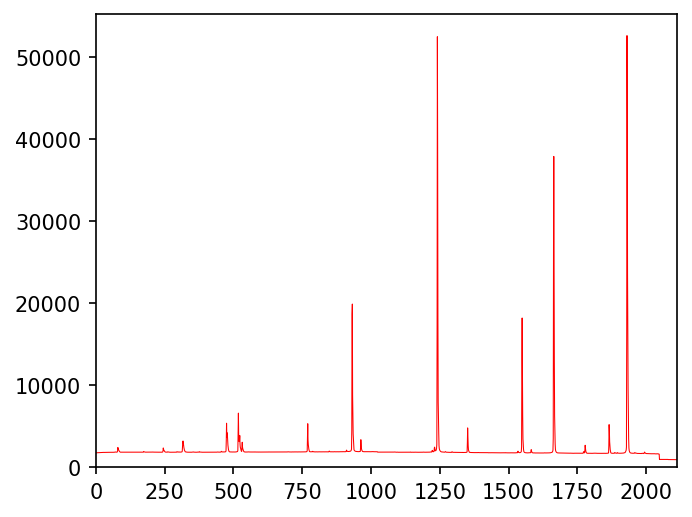

In [22]:
plt.figure(figsize=(5,4),dpi=150)
plt.plot(np.arange(len(arc[0].data[0])),np.median(arc[0].data,axis=0),'r-',linewidth=0.5)
plt.ylim(0,)
plt.xlim(0,2112)

(1300, 1400)

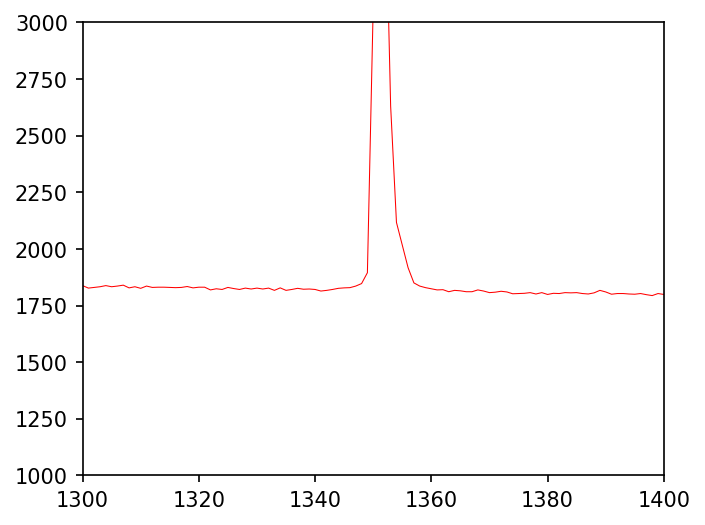

In [66]:
plt.figure(figsize=(5,4),dpi=150)
plt.plot(np.arange(len(arc[0].data[0])),np.median(arc[0].data,axis=0),'r-',linewidth=0.5)
plt.ylim(1000,3000)
plt.xlim(1300,1400)

In [33]:
def func1(x,a1,m1,s1,c1):
    return a1*np.exp(-((x-m1)/s1)**2)+c1

def GaussFit(wave,flux):
    popt,pcov=curve_fit(func1,wave,flux,bounds=([1000,min(wave),0.01,0],[1e5,max(wave),20,2000]))
    return(popt)

In [69]:
WW_N=[55,220,295,455,745,905,1215,1325,1525,1640,1910]
WW_N_fit=[]
REAL=[3261.05,3403.65,3466.55,3610.51,3888.65,4046.56,4358.33,4471.50,4678.16,4799.92,5085.82]
for i in range(len(WW_N)):
    rr=GaussFit(np.linspace(WW_N[i],WW_N[i]+50,51),np.median(arc[0].data,axis=0)[WW_N[i]:WW_N[i]+51])
    print(rr[1])
    WW_N_fit.append(rr[1])

80.46433422822862
245.4423068271917
317.1470409121326
476.3913893271991
769.95181921103
931.6561615323765
1241.3811052113522
1351.2258034574231
1549.0077453888637
1664.0280026152652
1930.5592769856255


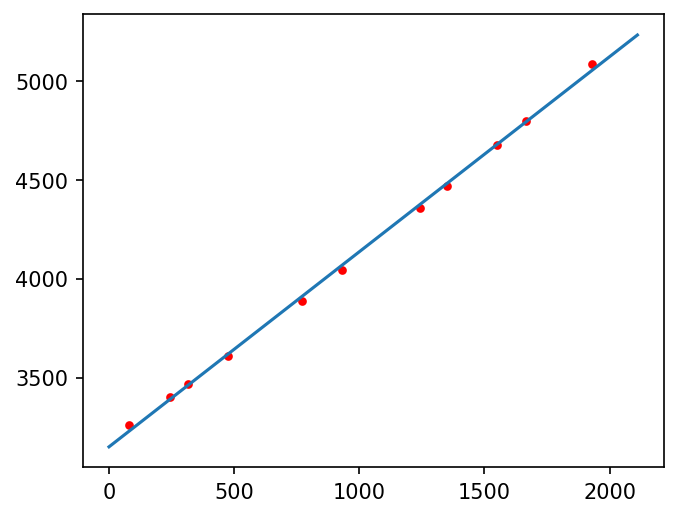

In [73]:
plt.figure(figsize=(5,4),dpi=150)
plt.scatter(WW_N_fit,REAL,c='r',s=10)
p1=np.poly1d(np.polyfit(WW_N_fit,REAL,1))
plt.plot(np.arange(2112),p1[1]*np.arange(2112)+p1[0])

In [77]:
sun=fits.open('solar_spectrum.fits')
sun_spec=np.median(sun[0].data,axis=0)

(3150, 5175)

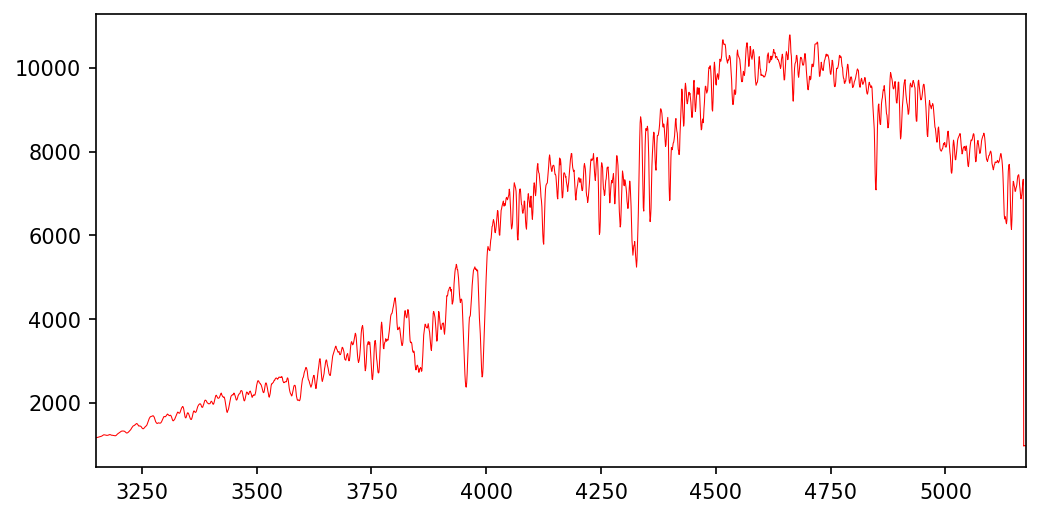

In [87]:
plt.figure(figsize=(8,4),dpi=150)
plt.plot(p1[1]*np.arange(2112)+p1[0],sun_spec,'r-',linewidth=0.5)
plt.xlim(3150,5175)